In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from trott import *
from qiskit import IBMQ
from qiskit.providers.aer import QasmSimulator
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit

In [21]:
trott_gate = gen_3cnot_trott_gate() # using the basic trott method (this can be changed)x
trott_steps_range = np.arange(4,18,1)
unitary_folding_steps_range = np.arange(0,10,1)
qcs = gen_st_qcs_range(trott_gate, trott_steps_range, unitary_folding_steps_range=unitary_folding_steps_range)
# qcs[10][-2].draw() # e.g. 10 trott steps, example tomo circuit

In [22]:
qcs[(4,3)][-1].draw()

»
q709_0: ─────────────────────────────────────────────────────────────»
             ┌────────────┐┌────────────┐┌────────────┐┌────────────┐»
q709_1: ─────┤0           ├┤0           ├┤0           ├┤0           ├»
             │            ││            ││            ││            │»
q709_2: ─────┤            ├┤            ├┤            ├┤            ├»
        ┌───┐│            ││            ││            ││            │»
q709_3: ┤ X ├┤1 Trot(π/4) ├┤1 Trot(π/4) ├┤1 Trot(π/4) ├┤1 Trot(π/4) ├»
        └───┘│            ││            ││            ││            │»
q709_4: ─────┤            ├┤            ├┤            ├┤            ├»
        ┌───┐│            ││            ││            ││            │»
q709_5: ┤ X ├┤2           ├┤2           ├┤2           ├┤2           ├»
        └───┘└────────────┘└────────────┘└────────────┘└────────────┘»
q709_6: ─────────────────────────────────────────────────────────────»
                                                                     »
c689: 3/═════════════════════════════════════════════════════════════»
                                                                     »
«                                                                      »
«q709_0: ──────────────────────────────────────────────────────────────»
«        ┌────────────┐┌───────────────┐┌────────────┐┌───────────────┐»
«q709_1: ┤0           ├┤0              ├┤0           ├┤0              ├»
«        │            ││               ││            ││               │»
«q709_2: ┤            ├┤               ├┤            ├┤               ├»
«        │            ││               ││            ││               │»
«q709_3: ┤1 Trot(π/4) ├┤1 Trot_dg(π/4) ├┤1 Trot(π/4) ├┤1 Trot_dg(π/4) ├»
«        │            ││               ││            ││               │»
«q709_4: ┤            ├┤               ├┤            ├┤               ├»
«        │            ││               ││            ││               │»
«q709_5: ┤2           ├┤2              ├┤2           ├┤2              ├»
«        └────────────┘└───────────────┘└────────────┘└───────────────┘»
«q709_6: ──────────────────────────────────────────────────────────────»
«                                                                      »
«c689: 3/══════════════════════════════════════════════════════════════»
«                                                                      »
«                                        ░          
«q709_0: ────────────────────────────────░──────────
«        ┌────────────┐┌───────────────┐ ░ ┌─┐      
«q709_1: ┤0           ├┤0              ├─░─┤M├──────
«        │            ││               │ ░ └╥┘      
«q709_2: ┤            ├┤               ├─░──╫───────
«        │            ││               │ ░  ║ ┌─┐   
«q709_3: ┤1 Trot(π/4) ├┤1 Trot_dg(π/4) ├─░──╫─┤M├───
«        │            ││               │ ░  ║ └╥┘   
«q709_4: ┤            ├┤               ├─░──╫──╫────
«        │            ││               │ ░  ║  ║ ┌─┐
«q709_5: ┤2           ├┤2              ├─░──╫──╫─┤M├
«        └────────────┘└───────────────┘ ░  ║  ║ └╥┘
«q709_6: ────────────────────────────────░──╫──╫──╫─
«                                        ░  ║  ║  ║ 
«c689: 3/═══════════════════════════════════╩══╩══╩═
«                                           0  1  2

# Prepare Backend

In [23]:
# load IBMQ Account data

# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-04-23 11:17:06,140: Credentials are already in use. The existing account in the session will be replaced.


In [24]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')
# properties = jakarta.properties()

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim = QasmSimulator()

# Capture Data

In [25]:
old_results = np.load('data/3cnot_noise_sim_unitary_folding_results_20220422__171952.npy',allow_pickle=True).item()

In [ ]:
results = gen_results(qcs, backend=sim_noisy_jakarta, results=old_results, label="data/3cnot_noise_sim_unitary_folding")
# results = np.load('data/3cnot_noise_sim_unitary_folding_results_20220422__171952.npy',allow_pickle=True).item()

  0%|                                                                                                                                                                                                 | 0/140 [00:00<?, ?it/s]

Running 6 more reps for (4, 0).
Running with trott_steps = (4, 0)
Job ID 7aa5eece-bfb6-442f-94dd-3d8e03fc34dc
Job ID 5496a85a-8714-4351-b4a2-b84775f2bd14
Job ID a674d2e1-fb0c-45e2-ad1f-6bedf55d982d
Job ID f296aafa-a5cc-4df6-9bba-ee9eaee98ca2
Job ID 7b76faae-340d-4291-9ac1-11a7ee6220ac
Job ID 0a33ad50-e535-4270-b042-2b4ed2fee616
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  1%|█▎                                                                                                                                                                                     | 1/140 [00:45<1:44:40, 45.18s/it]

Running 6 more reps for (4, 1).
Running with trott_steps = (4, 1)
Job ID 89131df5-ab90-4c15-826e-f63055be33be
Job ID 5f5d742d-98c1-4315-a7ba-30cc5acdd00f
Job ID d79b28d9-13f2-4606-8423-32511af3dddd
Job ID 489a5633-2cf9-4684-8c3b-9038790ca102
Job ID b1240a9b-eb8e-4b30-bb2b-293f413e2323
Job ID e5b63825-69a6-42d9-a5b9-ba0fdd302f0e
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  1%|██▌                                                                                                                                                                                    | 2/140 [01:32<1:46:55, 46.49s/it]

Running 6 more reps for (4, 2).
Running with trott_steps = (4, 2)
Job ID 7f33d752-e8c8-4119-b12a-87dc7ba6568f
Job ID 2bce312a-2e5a-437b-84cf-f63717d46844
Job ID d9d38245-dab6-40ee-8554-05d88b6ad4ee
Job ID 9a46d689-d1e6-4e51-bef9-61cdd0da5f01
Job ID 1c68062b-809e-4b08-99be-d828ff25cc26
Job ID b226f790-0750-4cb8-b5d4-aabd07a1d54d
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  2%|███▉                                                                                                                                                                                   | 3/140 [02:12<1:39:44, 43.68s/it]

Running 6 more reps for (4, 3).
Running with trott_steps = (4, 3)
Job ID b0e2d33c-6abd-4bab-b156-c89541f98fe3
Job ID 8ca7d4a5-bf22-4efa-ab9f-65c0a7aeb618
Job ID 9ed5f8eb-77ba-4027-9e30-68a7dc089fb3
Job ID 7e5e07d6-542f-40eb-9402-0e16420fb78e
Job ID f5f81477-c57a-4753-8774-ad53ff7a58d0
Job ID 03b4b67e-7806-46df-a76b-6904d0eac3bd
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  3%|█████▏                                                                                                                                                                                 | 4/140 [03:00<1:42:23, 45.17s/it]

Running 6 more reps for (4, 4).
Running with trott_steps = (4, 4)
Job ID c4f386b1-2db3-492f-bcaf-efc5cb9c9073
Job ID bb09ebb6-fe37-4805-847b-d9a960bd7729
Job ID 6a1e785e-e43f-4c7f-849b-2b505d7cbe31
Job ID a5beae2d-d62c-4570-bb38-952ea95d2726
Job ID bd3e28fd-ea10-4450-a8b2-46484ce23920
Job ID 4554409b-29a8-4cb9-9531-cdbd05b36374
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  4%|██████▌                                                                                                                                                                                | 5/140 [03:59<1:53:01, 50.24s/it]

Running 6 more reps for (4, 5).
Running with trott_steps = (4, 5)
Job ID c8a6bdc1-b8f9-4c48-a2c3-8de3c140b296
Job ID c686b780-9c79-4d59-be42-ae77725045f5
Job ID 2f818076-b846-4b08-938f-e9fc04514d95
Job ID 4f9e2b6e-1fd6-46dd-a36a-3c129a43fc4d
Job ID 6fcd64b3-9c5f-45e7-a595-1c3fa632b4fe
Job ID a8f6b801-39ca-4dd5-95f9-9d35c7d03576
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  4%|███████▊                                                                                                                                                                               | 6/140 [05:06<2:04:47, 55.88s/it]

Running 6 more reps for (4, 6).
Running with trott_steps = (4, 6)
Job ID 42f5da49-2e76-47c2-ac05-af516bd2cea1
Job ID 689a89f9-024c-42ef-a551-4c35500dc1e4
Job ID 5c4d3779-1c48-4c19-a6cf-2154f0888cf4
Job ID 7afeb2c7-8c01-4e38-9111-049308201d24
Job ID 808855c2-30c6-4b2e-8b1a-3b00976ac0c1
Job ID 21075f43-3259-4361-93cd-d3e6fe75ea05
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  5%|█████████▏                                                                                                                                                                             | 7/140 [06:00<2:02:38, 55.33s/it]

Running 6 more reps for (4, 7).
Running with trott_steps = (4, 7)
Job ID 3e3f7ca5-788a-42de-8f0c-cec5a3986a5f
Job ID 7dff8fb1-22fd-430e-8ca1-8fcd45898c39
Job ID d03afe63-a91b-42cd-8adf-61cc79db0835
Job ID 47487813-dc60-4a90-9b68-94159d73ccc5
Job ID e9fd5717-c1df-4d60-9c0c-efc88332797e
Job ID 5f21e4c3-a522-456d-8afb-498116377775
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  6%|██████████▍                                                                                                                                                                            | 8/140 [07:08<2:10:43, 59.42s/it]

Running 6 more reps for (4, 8).
Running with trott_steps = (4, 8)
Job ID 8c93a6fe-05a1-48c7-a90f-9ae14e27e77f
Job ID 430f8a64-14b0-4ff1-b3a0-e89e8fb00bfa
Job ID 2134c615-7675-4a43-a768-c1707882490a
Job ID 61e30d96-9dc1-4fde-a4e7-c847f7435ab6
Job ID cbfaaff4-1e0c-4ab7-b894-65a406bbad8b
Job ID 95ebb22a-732d-4617-a667-e667247d50e0
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  6%|███████████▊                                                                                                                                                                           | 9/140 [08:20<2:18:14, 63.32s/it]

Running 6 more reps for (4, 9).
Running with trott_steps = (4, 9)
Job ID bb642a2a-88f8-4f7b-9cd9-8e0255cd06a2
Job ID 62211f93-11c3-461c-9c89-b10724d3a1cc
Job ID 40be27e3-2002-4d4e-9b68-8e3d0aaa17fe
Job ID cd6374dd-e78c-4baa-b749-ae7cdd0e66e4
Job ID 03dcbf15-c30a-4a26-bcae-6d8240b735aa
Job ID f3dd075c-a5bc-4b3d-b4db-e5cb55ce7ecf
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  7%|█████████████                                                                                                                                                                         | 10/140 [09:39<2:27:19, 68.00s/it]

Running 6 more reps for (5, 0).
Running with trott_steps = (5, 0)
Job ID ec5ccd59-b13a-4623-a464-c1ccb11dd169
Job ID 7ce09def-4acf-4cb1-b5b0-4577410a7be0
Job ID eebe6d0d-3a81-4976-ada2-1a6b0c5c89b8
Job ID 6d942ab9-3f97-4f9a-9f2a-b8c362c8cccc
Job ID d3b2d0a0-e20f-4f3f-a074-23f2836a4566
Job ID 4eff35cb-7049-4113-af89-a516cf9d2333
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  8%|██████████████▎                                                                                                                                                                       | 11/140 [10:26<2:12:49, 61.78s/it]

Running 6 more reps for (5, 1).
Running with trott_steps = (5, 1)
Job ID 9cc6ec79-b8ef-4ab6-95b3-84dc804f59a0
Job ID 36fab951-79ff-4a0a-a90d-ec6184062c61
Job ID 2804503b-6d96-4bfb-bbe4-3a6518ab00bf
Job ID 2f9e3cac-0f79-4a98-820e-d38f46b98ed5
Job ID 7768fabd-b6e7-40eb-952d-590bc6e4166d
Job ID e3bd2850-6b5c-4186-a41c-ec24babb8ff1
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  9%|███████████████▌                                                                                                                                                                      | 12/140 [11:08<1:58:40, 55.63s/it]

Running 6 more reps for (5, 2).
Running with trott_steps = (5, 2)
Job ID c3e94262-a8c0-430e-8518-d1179cd9c0e7
Job ID 94dbd205-db0a-43a1-9850-59909be880fc
Job ID 160d0623-56da-4919-97d0-d6b3cddadee8
Job ID 95a9f764-a760-480d-996d-698edf771dcf
Job ID aba100a2-d7bf-40b7-a311-805e468fa925
Job ID bce4f0ef-1c0e-4302-99b7-e0fa1c23282f
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


  9%|████████████████▉                                                                                                                                                                     | 13/140 [11:45<1:45:55, 50.04s/it]

Running 6 more reps for (5, 3).
Running with trott_steps = (5, 3)
Job ID 13ec350b-2add-4c17-bc31-eedae7dbceb1
Job ID 333dbf83-03e4-4b19-9d8b-c7484a16f3c3
Job ID bdf072e3-6b6e-4f63-a244-c1d875041715
Job ID 23ab544e-b4a1-4308-8ed9-960783df9b97
Job ID bd23d1e2-75a7-4443-93cb-b64ab09cc813
Job ID 57806ab7-0a21-408e-8b8d-4de49d65af21
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 10%|██████████████████▏                                                                                                                                                                   | 14/140 [12:24<1:38:07, 46.72s/it]

Running 6 more reps for (5, 4).
Running with trott_steps = (5, 4)
Job ID 264b1d3e-0287-4ce7-9dfd-369165e6c5de
Job ID a136cc6d-5f85-4ba6-ac65-2d2892781772
Job ID 6d0adfd6-b275-4e32-b0e0-af28b5b1c100
Job ID 955db50d-7995-4b33-b97f-5e4534177af5
Job ID 904c5d31-b316-4947-81ce-9b95a07496a0
Job ID a4ac0e84-a742-4e0e-910d-485ea23e8fcc
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 11%|███████████████████▌                                                                                                                                                                  | 15/140 [13:07<1:34:49, 45.52s/it]

Running 6 more reps for (5, 5).
Running with trott_steps = (5, 5)
Job ID 11ccd677-ab39-4ecc-bc61-7a826a1667ed
Job ID 5b705f2b-bfc1-454e-90e1-79f54dfe89c1
Job ID 6e7d6153-b3ff-4041-b137-9c546a751ed3
Job ID a575b642-9f18-44d2-981d-77e09e36dd20
Job ID de5c7d5b-8719-497f-a39d-0c8ca9974496
Job ID 7c0ad8cd-15a0-4353-bc0d-024942ecac8a
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 11%|████████████████████▊                                                                                                                                                                 | 16/140 [14:00<1:39:00, 47.91s/it]

Running 6 more reps for (5, 6).
Running with trott_steps = (5, 6)
Job ID 6da42aa6-56b9-4de8-88a6-18d301582a86
Job ID 0ee900e1-2e1f-4997-9394-8924e00a0a29
Job ID 10bc352c-f368-4615-b8f8-65c54ff8df62
Job ID 5b1897ce-8e69-4272-a874-ce9c4f993eb5
Job ID 79aff522-6e0d-4dea-ae24-4e0b46d542e2
Job ID f824a7e1-e51e-41bb-b5be-354f16548268
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 12%|██████████████████████                                                                                                                                                                | 17/140 [14:57<1:43:43, 50.60s/it]

Running 6 more reps for (5, 7).
Running with trott_steps = (5, 7)
Job ID 054512c9-f389-415c-8f66-91f30289b4dd
Job ID e6967d7d-f564-42ff-a83f-b4465efeef3d
Job ID 805abc68-f426-4097-830c-a8cd36f4e6e9
Job ID 3e8584b3-fe3a-4adb-8cd3-e46f0761a4ab
Job ID aae09972-c2d6-4c47-a51d-3b5f6241acc4
Job ID 3c5254b1-f0a1-418d-aeeb-391c2161563f
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 13%|███████████████████████▍                                                                                                                                                              | 18/140 [16:03<1:52:05, 55.13s/it]

Running 6 more reps for (5, 8).
Running with trott_steps = (5, 8)
Job ID b4b77217-c580-48f1-acc3-09129750df00
Job ID d586e134-4472-4d5f-a13e-839a8edf3fa4
Job ID d0820ed0-b737-403b-aa64-15237b65103d
Job ID 7e4ff794-d453-4744-b458-05f121a3a98c
Job ID b242cc89-edea-4321-b1a8-b3f09a05fdf8
Job ID b73d45a1-658a-4d86-a257-5e01cd0b34e6
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 14%|████████████████████████▋                                                                                                                                                             | 19/140 [17:06<1:55:43, 57.38s/it]

Running 6 more reps for (5, 9).
Running with trott_steps = (5, 9)
Job ID 23a15f17-b120-4e21-87fb-1d7b60ceecfa
Job ID 82f7e64c-399f-42d1-ba71-4a9dd4d3f9f0
Job ID 799e5627-2336-4557-912d-ea03213877d7
Job ID 817c8098-e753-4658-baae-22ec4dbf704a
Job ID 6993afea-bf00-4c9b-9094-97107501f1b0
Job ID 6a2b5dce-eb8e-4c4e-a3cd-4b46106663d6
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 14%|██████████████████████████                                                                                                                                                            | 20/140 [18:04<1:55:32, 57.77s/it]

Running 6 more reps for (6, 0).
Running with trott_steps = (6, 0)
Job ID bfa39251-24c6-4719-a957-4963dd2f1377
Job ID eaaffae7-eddb-470b-a91a-17b2d3d2fa63
Job ID 68c103e4-5948-4e6e-9b1a-938e23194ba3
Job ID 96a45ae7-9c4e-4d87-ad4b-0c469fa07d7d
Job ID 0c45d015-dd15-4e00-8b8c-b7f51e1a0514
Job ID cf219519-da78-47f8-8b7d-9aad0f896fe1
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 15%|███████████████████████████▎                                                                                                                                                          | 21/140 [18:33<1:37:33, 49.19s/it]

Running 6 more reps for (6, 1).
Running with trott_steps = (6, 1)
Job ID e8ab18ad-2c33-4c63-84db-cfb768de969e
Job ID 065b43df-7c23-4868-a03a-0ad64a03063a
Job ID 003167d8-786c-4ca0-8ace-3df52a2a57ab
Job ID 0478af76-5f0e-4e96-aa29-2bd7da7241e1
Job ID 3d7bd0f3-a0a3-47fa-82a3-23d807e9457e
Job ID eef113c3-10c7-458c-ae4b-e714dcf724c1
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 16%|████████████████████████████▌                                                                                                                                                         | 22/140 [19:07<1:27:44, 44.61s/it]

Running 6 more reps for (6, 2).
Running with trott_steps = (6, 2)
Job ID 147e1e2b-0bf1-4ec0-8c07-ba590a10774b
Job ID e272c2c3-9883-4bf3-8e53-aecb94579a00
Job ID 773a46c7-38d4-4c81-9b7e-6e647e8a226c
Job ID 6fb253ac-e9a7-4ce9-ac78-e267f246525e
Job ID 051f98ed-7657-4913-ad28-419ff244c3c8
Job ID 1325cf19-f1a4-4848-bb34-ac27341995be
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 16%|█████████████████████████████▉                                                                                                                                                        | 23/140 [19:40<1:20:05, 41.08s/it]

Running 6 more reps for (6, 3).
Running with trott_steps = (6, 3)
Job ID a31ac1cd-94e3-4c70-8e11-5e229e3f6e65
Job ID ffc13101-e1b5-4041-be38-c538040d3f03
Job ID a7efdd59-a514-4e47-aa73-c326b61b21d6
Job ID 926198dd-ed09-458e-b6db-1468f8939a4e
Job ID 44a6ab05-9202-408d-8e3d-feb8d8b33da3
Job ID a22fe06d-6be5-42dc-8d26-f196b2f3cae6
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 17%|███████████████████████████████▏                                                                                                                                                      | 24/140 [20:20<1:18:58, 40.85s/it]

Running 6 more reps for (6, 4).
Running with trott_steps = (6, 4)
Job ID ad15a1f2-452e-4471-9508-373b3e426b5e
Job ID 03eb6ad8-3cc9-40b7-842c-b626ab7b9a11
Job ID 28743f9e-9123-4489-8a4d-f324bcab8c10
Job ID b7da6a2a-6745-4f82-8b5a-daa308298ce0
Job ID 3fdb779b-32e2-4a15-83b0-8d2849cfa290
Job ID 7a371821-cf16-4cdc-8a5d-b19ba97ebdaa
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 18%|████████████████████████████████▌                                                                                                                                                     | 25/140 [21:02<1:18:42, 41.06s/it]

Running 6 more reps for (6, 5).
Running with trott_steps = (6, 5)
Job ID 95524f01-982f-4ba1-83fe-c35aacbfef0c
Job ID 8d65f4f6-08b2-4f91-8fe8-80aec2f52dbc
Job ID 5862cede-d094-4a0a-a05a-09d44a0eff85
Job ID f3cf93c8-2c2b-457f-a28e-b11b60c031ab
Job ID b0e2984b-a2be-40d2-992b-d07e7db01b1a
Job ID 4e5ace29-bf6b-4948-afe8-f298219523b1
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 19%|█████████████████████████████████▊                                                                                                                                                    | 26/140 [21:49<1:21:20, 42.81s/it]

Running 6 more reps for (6, 6).
Running with trott_steps = (6, 6)
Job ID ba7e0af0-1cda-4c63-9e80-60d44e39c6e0
Job ID 6925bc70-f60e-4616-9457-20a172eca49d
Job ID 59329ffa-78ec-49e7-b7f2-1179c63c1543
Job ID 2585aab3-f2e1-4d0d-962a-d71339054c69
Job ID efd56f8d-900e-49a0-b384-2e126f10e9c7
Job ID 63b48faf-e5c3-4590-90b3-3481b9cca8bb
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 19%|███████████████████████████████████                                                                                                                                                   | 27/140 [22:46<1:28:52, 47.19s/it]

Running 6 more reps for (6, 7).
Running with trott_steps = (6, 7)
Job ID b7eb9e5a-f444-4d05-8e27-6f42535d1c53
Job ID c584d1e4-9fc5-4466-8c86-9f98bc73edf8
Job ID 83128f98-d6f4-439a-88d0-dc464287ead6
Job ID 9986adcc-525c-4fd1-97e7-09b6d53a3be9
Job ID 3aed9f89-bc28-4e81-a170-f8dabd6a47e0
Job ID 5c63a2b7-fa17-4b9d-8a49-fd6adbd2df3d
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 20%|████████████████████████████████████▍                                                                                                                                                 | 28/140 [23:43<1:33:21, 50.01s/it]

Running 6 more reps for (6, 8).
Running with trott_steps = (6, 8)
Job ID 7baeeed6-30c1-4b90-bf5a-123cf6721b6d
Job ID fa34f8db-2f0f-49fb-8f63-b9065b337a36
Job ID bcad41a7-fff2-4cd5-b3a1-de670ec447ea
Job ID 45f7321a-4f26-4f5f-9d81-652271e4096f
Job ID 9c874390-2293-4ef8-bd6b-eb2008a11a9c
Job ID e961e353-d72a-43ba-92c9-208cd29f4eec
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 21%|█████████████████████████████████████▋                                                                                                                                                | 29/140 [25:08<1:51:53, 60.48s/it]

Running 6 more reps for (6, 9).
Running with trott_steps = (6, 9)
Job ID b3e0b41b-e3ff-4ba6-becb-aa2361b963cf
Job ID ecf19b3c-5adf-4661-9b9b-dced72ed791d
Job ID adda293f-4378-41c1-a75b-892b8b15a335
Job ID d0a71710-eea4-4619-a7bf-51bd465b595b
Job ID 088aa915-4018-4850-a307-d69cf1455921
Job ID 68b6b8ef-dd7b-4cb1-a5fa-ebfbfdab8ee0
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 21%|███████████████████████████████████████                                                                                                                                               | 30/140 [26:19<1:56:52, 63.75s/it]

Running 6 more reps for (7, 0).
Running with trott_steps = (7, 0)
Job ID 2ac67c94-2b28-4b38-85b3-af5f5905bfa5
Job ID 558bfca7-8464-48d2-8391-a87cd8f71add
Job ID dd6646fb-64cb-4f9d-8497-765d9ce5101d
Job ID d1cb3b8e-8911-4605-a608-2a90c2dff9e1
Job ID 436ef240-9424-4dee-9cae-b0cf6500e0de
Job ID 1f96bc57-57be-4a3f-97a9-d5c836188a46
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 22%|████████████████████████████████████████▎                                                                                                                                             | 31/140 [26:54<1:40:09, 55.14s/it]

Running 6 more reps for (7, 1).
Running with trott_steps = (7, 1)
Job ID 211433ce-bd8c-4952-bf58-2ac8284a0fa5
Job ID 0c9e2197-159e-4fe8-bbc6-abb30428a8df
Job ID b1942588-5346-4d07-86cf-1dfa7c5c6466
Job ID bf8aba9d-8271-49a4-b50d-17a12ae3959f
Job ID cc7498cf-4175-4035-86d0-7c1ca98536b9
Job ID 29f0cc28-5954-4813-ac7e-ac5ab6e1a4c9
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 23%|█████████████████████████████████████████▌                                                                                                                                            | 32/140 [27:32<1:29:47, 49.89s/it]

Running 6 more reps for (7, 2).
Running with trott_steps = (7, 2)
Job ID 71c63caf-836f-4f5f-809f-a90aea615f48
Job ID 0cef2b80-6c09-4432-acc6-db2709a591db
Job ID 294d81eb-c5cf-4ba5-be16-e8b168155203
Job ID 2fad7c62-445f-400a-a101-7506292ff5c0
Job ID 5b377c70-5d73-4829-a031-c05cd06ac4b0
Job ID 340c666f-ad20-47c7-9820-7bf89b38ea4f
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 24%|██████████████████████████████████████████▉                                                                                                                                           | 33/140 [28:14<1:24:34, 47.43s/it]

Running 6 more reps for (7, 3).
Running with trott_steps = (7, 3)
Job ID 9c4fd012-b00d-4252-8a3f-f24e5e6a5ce8
Job ID 2085495e-ad86-4c12-8c1b-a6585cbc5154
Job ID bcd5720b-6233-432d-ab0e-4ebd194cc316
Job ID 280b9aef-91ee-43f4-8253-84f791588f9e
Job ID 968db183-7bd7-4cd2-8b21-9f863a1838de
Job ID 7caec39b-4129-4f2d-9f19-e0a0abc8778c
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 24%|████████████████████████████████████████████▏                                                                                                                                         | 34/140 [28:59<1:22:50, 46.89s/it]

Running 6 more reps for (7, 4).
Running with trott_steps = (7, 4)
Job ID e971e07f-7937-4516-b9e5-1fa156e35c64
Job ID 23f25b0d-854d-412f-abc6-dec006b83fcc
Job ID fa503d28-10cf-43d1-ad33-c6b64823072e
Job ID d110967a-80ea-4d9e-a862-f7517fb831b1
Job ID 3bfd0262-9da1-4783-bf58-5ccd7702616a
Job ID 670e9ff5-9391-4696-bb3d-cb71282de07d
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 25%|█████████████████████████████████████████████▌                                                                                                                                        | 35/140 [29:59<1:28:48, 50.75s/it]

Running 6 more reps for (7, 5).
Running with trott_steps = (7, 5)
Job ID 79374b21-e956-4c99-877e-076b3d7bbaf2
Job ID a3db59c1-c9ec-40b9-a0b0-d97ed26da1c7
Job ID a6eec3c0-a433-4b83-a702-b9b21366b7be
Job ID 1bdf22b3-a329-4579-a761-8c91f8487a35
Job ID bea15531-7d8d-4578-a21e-603a277b29b7
Job ID bc97b2ce-95a2-4f2f-a7b8-d33831340e5e
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 26%|██████████████████████████████████████████████▊                                                                                                                                       | 36/140 [30:56<1:31:20, 52.69s/it]

Running 6 more reps for (7, 6).
Running with trott_steps = (7, 6)
Job ID e609349f-b9b8-47d0-84fc-070f0218e78d
Job ID 069d2a84-56ab-4969-aa3a-3bf87194fa65
Job ID 70ef776a-1ec3-4b05-a9ba-7ce4d43691db
Job ID 91f940bb-0bd7-4534-8920-80db2d2abe07
Job ID a3344ec2-97e0-4033-96e4-d543228729a3
Job ID 506c742c-b1e2-41eb-9d83-14906d187821
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 26%|████████████████████████████████████████████████                                                                                                                                      | 37/140 [31:53<1:32:33, 53.92s/it]

Running 6 more reps for (7, 7).
Running with trott_steps = (7, 7)
Job ID 6f49a55b-ff5a-4b32-bd64-49a4ee0229a7
Job ID 3e563063-9263-4aae-bd18-7be1936846f2
Job ID cb917c3b-ce04-4ba9-a0eb-0a3c7c22b8bc
Job ID afbe2fd9-2d04-433d-9cc9-cae028fba314
Job ID 9ca39b92-5cfe-403f-97e4-ff62d89f667d
Job ID 9210ab53-3fc3-407e-8187-220fc81d5148
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 27%|█████████████████████████████████████████████████▍                                                                                                                                    | 38/140 [33:07<1:42:09, 60.09s/it]

Running 6 more reps for (7, 8).
Running with trott_steps = (7, 8)
Job ID c6bfdee7-6cad-48eb-861e-24cff9a64b72
Job ID 813d3efb-5eec-4926-b74c-251fa3e17a40
Job ID ab5ed9b0-03ac-4179-ba30-72f5b4e4e85b
Job ID f4c6a3fe-1f7d-4417-ac2b-73c0e82699c3
Job ID 530abd29-e2db-4679-85b2-7bf0b946156d
Job ID 71f8310b-8f9c-49fb-a21e-6ebb09dfc522
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 28%|██████████████████████████████████████████████████▋                                                                                                                                   | 39/140 [34:26<1:50:37, 65.72s/it]

Running 6 more reps for (7, 9).
Running with trott_steps = (7, 9)
Job ID b0b260ae-09d7-4d48-b45b-8dee6ff9e86c
Job ID 4d6c08ed-d41e-4589-8962-7a38987747e2
Job ID 46c2436e-9d72-4f5d-ad52-5438423fd5da
Job ID c90e8173-0174-4b6c-801b-3e91bdb41d4b
Job ID dfc93e13-3db2-4f09-aec0-161cff67437b
Job ID 71b59c88-1003-4ffb-b252-c3b6fba52310
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 29%|████████████████████████████████████████████████████                                                                                                                                  | 40/140 [35:52<1:59:28, 71.69s/it]

Running 6 more reps for (8, 0).
Running with trott_steps = (8, 0)
Job ID 4e61f002-1777-46f8-8c1f-c8517cb32af3
Job ID cfc24faa-8171-4bd3-bc45-6f03af9e4c9a
Job ID 6e8a6f30-a83a-4375-9d7d-4828f18c919e
Job ID f054d34e-51ed-4adc-adf5-75dbb5b3b98f
Job ID d5e825de-f6dc-47cb-89c1-650e80079370
Job ID 8c24dc3c-b5c9-48ce-8c67-957c5ab964e3
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 29%|█████████████████████████████████████████████████████▎                                                                                                                                | 41/140 [36:28<1:40:50, 61.12s/it]

Running 6 more reps for (8, 1).
Running with trott_steps = (8, 1)
Job ID 9dfca5cb-7ca2-44b6-99d8-e9ac605e478d
Job ID 3e2c8307-6448-4aea-82e6-13c7f73d9004
Job ID 717cd4c9-70f0-464a-b76b-0f21ecd93c99
Job ID 6df45573-75d4-4c72-b1e0-1517e3529a08
Job ID 4d6d15f3-61f7-42f2-a74b-ba8f5d0eb297
Job ID d6ece314-dcf3-4047-8fd4-57359867861f
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 30%|██████████████████████████████████████████████████████▌                                                                                                                               | 42/140 [37:08<1:29:25, 54.75s/it]

Running 6 more reps for (8, 2).
Running with trott_steps = (8, 2)
Job ID a58bebd1-e49e-417a-9d14-37f427497bde
Job ID f51c45b6-412c-440d-bebb-f54b6fcdae8d
Job ID 28c2758e-b57c-44f3-b985-e68cffac2153
Job ID 8fe19bed-ecd4-4ef4-b56f-fd4f612d8d09
Job ID 73a62be3-20bd-40d5-bf4e-7b2d91664e65
Job ID 5bf703fe-e7dc-4563-9ae0-52182908a590
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 31%|███████████████████████████████████████████████████████▉                                                                                                                              | 43/140 [38:06<1:29:56, 55.64s/it]

Running 6 more reps for (8, 3).
Running with trott_steps = (8, 3)
Job ID b785ef08-22ed-49b5-a522-75edba5929fd
Job ID 94bc1e82-b8a9-441b-b469-a63d7e15b5a0
Job ID b5b2ef5e-b56d-4185-aee6-4a4ac04e2c7b
Job ID f73c2c76-cd5a-4436-a8c3-79ea7420bf39
Job ID 0ad5e7ce-7eea-46dd-bd91-f02c81f84e22
Job ID 456eb8fb-e066-43f7-8792-d938cbc68818
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 31%|█████████████████████████████████████████████████████████▏                                                                                                                            | 44/140 [38:55<1:25:52, 53.67s/it]

Running 6 more reps for (8, 4).
Running with trott_steps = (8, 4)
Job ID 0f25aa8a-1cf0-4692-9dd1-ba8fe68fb64a
Job ID f182e38a-13a3-44c7-9534-29c68a1ae70c
Job ID 67d4c7a4-0f54-4b45-90c5-027c3fee338e
Job ID dcb7a281-2759-4ca7-ab83-eb80e7de8f8a
Job ID 17525d82-5422-476f-a17b-97c9edf44508
Job ID 103b4d20-8ef9-4b3b-80d3-864990bbf263
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 32%|██████████████████████████████████████████████████████████▌                                                                                                                           | 45/140 [39:58<1:29:29, 56.52s/it]

Running 6 more reps for (8, 5).
Running with trott_steps = (8, 5)
Job ID 46fe1e8f-5528-402a-a048-b74123038669
Job ID 1b3a78e3-546b-4d32-a42a-b5468d442fd5
Job ID 8980f94f-c029-4552-a20a-cee1d7333314
Job ID c98eb981-5aa1-4025-91a5-67d235c4061b
Job ID c14f4878-4d24-4219-9eed-299c0c3fcfdb
Job ID c2a9033d-2ba5-4a0b-97e0-3fe99fdc2080
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 33%|███████████████████████████████████████████████████████████▊                                                                                                                          | 46/140 [41:06<1:33:44, 59.84s/it]

Running 6 more reps for (8, 6).
Running with trott_steps = (8, 6)
Job ID 99bef389-a762-47ff-811a-0f5997f9a250
Job ID 87bcef5a-ea93-4beb-abc4-4907b13db91e
Job ID 9bb58807-c52d-47e4-9056-efe86f57c850
Job ID b6c7b081-02fa-472b-bcbc-91d2e25e4ec5
Job ID 0ccec4d0-e630-4afe-92a0-dbbe8cfd3cae
Job ID 9f0539f9-e789-4860-a5cb-65fc623a7c3d
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 34%|█████████████████████████████████████████████████████████████                                                                                                                         | 47/140 [42:13<1:36:22, 62.18s/it]

Running 6 more reps for (8, 7).
Running with trott_steps = (8, 7)
Job ID fe789b0c-07d8-41a5-acca-87c6b135b4a6
Job ID 8d5512b4-4af1-49d3-b9e9-3e4c2451f573
Job ID cb2e4aef-5c20-4a8c-8335-642c76d08aac
Job ID 6e0b5a35-f9c1-44c4-8801-23ddb126c221
Job ID 039d9328-e3e0-4a12-8ee2-44262187b493
Job ID 372bd4a4-c89b-40b1-bf4a-1362b6dae664
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 34%|██████████████████████████████████████████████████████████████▍                                                                                                                       | 48/140 [43:32<1:42:57, 67.15s/it]

Running 6 more reps for (8, 8).
Running with trott_steps = (8, 8)
Job ID b8e843e6-2327-4af2-b13f-1cd1604791bb
Job ID 0c16e3e7-a9bb-498b-b124-5e9c438a4f9a
Job ID 84a0efa0-96dc-4a91-b9cb-48d178d4cf46
Job ID ebf4b656-5018-407b-9ba5-57430eeb302b
Job ID 55ed5808-e041-452b-bade-478840f5ee40
Job ID c4967458-0f69-487b-8a3d-3d89dd66831e
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 35%|███████████████████████████████████████████████████████████████▋                                                                                                                      | 49/140 [45:02<1:52:03, 73.88s/it]

Running 6 more reps for (8, 9).
Running with trott_steps = (8, 9)
Job ID 84ad3c33-2639-4ff6-a12c-79460505e33a
Job ID 756abbe8-c74d-4ced-a1aa-245e92daeca9
Job ID 3dd29fd9-cf6a-4273-b270-f45a6665d854
Job ID 3053a937-2fbe-430a-8e2a-6c0c4e99dbde
Job ID 7afd3e2a-e86b-457a-854a-39703e0b08f0
Job ID e69f3552-3381-4a0f-90fb-1c6bbc9a7170
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 36%|█████████████████████████████████████████████████████████████████                                                                                                                     | 50/140 [46:27<1:55:51, 77.24s/it]

Running 6 more reps for (9, 0).
Running with trott_steps = (9, 0)
Job ID 422bd45d-f126-42d5-8b11-f1e70179bc02
Job ID b7c51f08-19d4-4bd7-bcc7-a2a5720e8533
Job ID cfee5055-a1ef-4261-90ef-48c0ab054e85
Job ID 202e30b7-d6d2-4828-837f-5180fe5b184b
Job ID 8d2bb8fc-9116-4fa6-a5b1-c192b81b1d03
Job ID 6bed8b04-4e64-4e3e-9605-18732ceae111
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 36%|██████████████████████████████████████████████████████████████████▎                                                                                                                   | 51/140 [47:38<1:51:44, 75.33s/it]

Running 6 more reps for (9, 1).
Running with trott_steps = (9, 1)
Job ID 4bf12db8-5b4a-4729-a5f7-d11e8ac194c7
Job ID ed400495-7ada-4c6b-81f4-40dab151b8ca
Job ID 889f91b5-fa73-4244-823a-3b926b0f34ae
Job ID 01f70461-71c6-43b0-8b00-3c31e8b28306
Job ID 379c00a6-e9fa-493d-b435-a25b0f84f03c
Job ID 37c56be0-1db9-4562-addc-99f9a2e27263
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 37%|███████████████████████████████████████████████████████████████████▌                                                                                                                  | 52/140 [48:35<1:42:39, 70.00s/it]

Running 6 more reps for (9, 2).
Running with trott_steps = (9, 2)
Job ID b6c217ac-9181-4344-aa81-2bf8484769a0
Job ID 7090de6d-32d7-4ef1-9fd7-c91881669627
Job ID 3391610e-1215-451a-9db0-a834ba75c65c
Job ID 2cd0d0e5-f309-469a-9e8f-2c9eca239789
Job ID b75a7c92-672c-42ae-9dbd-4551d94a1369
Job ID ca2deb12-781b-4e01-8767-23e847eca742
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 38%|████████████████████████████████████████████████████████████████████▉                                                                                                                 | 53/140 [49:35<1:36:53, 66.82s/it]

Running 6 more reps for (9, 3).
Running with trott_steps = (9, 3)
Job ID 2195fec0-a181-4b1a-aaa8-91fa386ab7e8
Job ID b5d045e3-f9a0-4c33-b151-8b6146a319ea
Job ID 364aeb75-1ffe-493c-b25f-3a570de76c01
Job ID 58ffd328-748d-4a7b-8bd3-6647c7134548
Job ID 64afe873-1f8a-4c30-bb4d-2ad4b30a9fa8
Job ID 62c40edc-a07d-47b1-96cb-dd7dd9883c64
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 39%|██████████████████████████████████████████████████████████████████████▏                                                                                                               | 54/140 [50:33<1:32:08, 64.28s/it]

Running 6 more reps for (9, 4).
Running with trott_steps = (9, 4)
Job ID 04443cac-d8e1-4c04-a02c-14beafa84d72
Job ID c9e0ddae-90f9-4367-862f-32f0d983ea44
Job ID 0ba9c3f2-9ef6-4495-b9d1-2e96a2f9d984
Job ID 58743e34-cdee-4a7c-b4ce-49707e6782f2
Job ID cdd4e8ff-bb38-48d1-b05d-5945c6a7aff9
Job ID 9b0e24e8-db38-471d-b5a8-823a211348df
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 39%|███████████████████████████████████████████████████████████████████████▌                                                                                                              | 55/140 [51:34<1:29:31, 63.20s/it]

Running 6 more reps for (9, 5).
Running with trott_steps = (9, 5)
Job ID 1a29e26d-1ba0-4ae9-afe3-937fa4988dfe
Job ID e37e2c4e-fc33-40a2-96e6-78cbf177f0e3
Job ID cd318250-6697-4492-8d22-50555dd9453d
Job ID 78e2dcfa-b21c-492d-8b6c-33b7641a5622
Job ID e9135c6f-51da-46ce-a17f-41776192fc33
Job ID 7e3d9511-3a64-4ff9-be84-6b7cca71201e
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 40%|████████████████████████████████████████████████████████████████████████▊                                                                                                             | 56/140 [52:37<1:28:29, 63.21s/it]

Running 6 more reps for (9, 6).
Running with trott_steps = (9, 6)
Job ID 8cf443f9-edb0-474d-8a85-195cb879ae6a
Job ID aa7a0892-92b9-48f5-a260-9fe5ab22bb0a
Job ID 3c1955fe-a5b4-4ed5-b9a9-a7e4ed78dddb
Job ID 5ce497b7-0dbb-485c-a684-4ce855e5e03d
Job ID b085ce29-2dd6-45ff-87d9-56a6e54512c9
Job ID 64698eb1-ef69-489e-9fa4-c421b3bde112
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 41%|██████████████████████████████████████████████████████████████████████████                                                                                                            | 57/140 [53:49<1:30:57, 65.75s/it]

Running 6 more reps for (9, 7).
Running with trott_steps = (9, 7)
Job ID b7f2ec21-4b4c-4fff-9809-de20a1d9db73
Job ID 8abe3276-1372-4d38-801d-24dc73bd5b32
Job ID 58271991-f422-4649-b0a7-cb9424da8ab1
Job ID 31c82ebf-dfb0-4c77-9022-7d777667bb88
Job ID bad1dfb2-f58a-4590-9e34-5bb0175a61d6
Job ID 66001f4e-b423-4222-b5a8-c4183387b4ce
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 41%|███████████████████████████████████████████████████████████████████████████▍                                                                                                          | 58/140 [55:03<1:33:12, 68.20s/it]

Running 6 more reps for (9, 8).
Running with trott_steps = (9, 8)
Job ID 97ba1fdf-379b-4b1c-89a1-974cac8f95ff
Job ID 131d06cc-6ba9-47a3-9b8b-3c09f3eabafd
Job ID 18111494-d75f-4b03-97dc-269b7b97947a
Job ID cdfc6a78-5f05-43ce-badb-52e81d03d6fb
Job ID 2581d3d9-4fcf-4b1c-9056-f836052f769b
Job ID 80a4f9f8-49f4-4661-b325-8d79ce035007
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 42%|████████████████████████████████████████████████████████████████████████████▋                                                                                                         | 59/140 [56:18<1:35:07, 70.46s/it]

Running 6 more reps for (9, 9).
Running with trott_steps = (9, 9)
Job ID 31378b9d-ed4d-4916-ac34-4d5868c0e23f
Job ID 29dcf607-d7a5-4a21-aa0c-c5c225d591ff
Job ID 961559c9-b21a-45fb-9b73-38576111e097
Job ID 2d13e5a9-3c73-451d-b502-6d20af28247b
Job ID 2e0f6dc5-3918-492f-bfe7-47afa5e2a3d0
Job ID bf711a98-2e7a-4c98-9abb-d4c71985e433
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 43%|██████████████████████████████████████████████████████████████████████████████                                                                                                        | 60/140 [57:38<1:37:42, 73.29s/it]

Running 6 more reps for (10, 0).
Running with trott_steps = (10, 0)
Job ID 86d18df4-9b3b-4a26-8e0b-9324e5ce9a98
Job ID f1c801c2-ff4b-4a1d-8f26-f522fcd1840f
Job ID 18853553-c8e4-41a8-a78b-c6f8f88b93b7
Job ID 637025f5-9599-494c-aa33-51a4e161d26d
Job ID 56cb00b8-6af3-4c43-b684-87548986ffe8
Job ID 7e27d065-bb1c-49da-bcdc-1a3fbe443c85
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 44%|███████████████████████████████████████████████████████████████████████████████▎                                                                                                      | 61/140 [58:27<1:26:55, 66.02s/it]

Running 6 more reps for (10, 1).
Running with trott_steps = (10, 1)
Job ID 8d013361-c221-474a-8cef-6e3c358013ad
Job ID c3da4372-925a-4ec0-94d2-bbfd86a4b27f
Job ID 460fdcda-61b5-4e08-8613-1c340347f9f2
Job ID eff5889e-5549-4641-8191-4238249d2a89
Job ID 9d760149-3089-4775-bdfe-ac217aed683b
Job ID 5aca5612-bd7d-4dcf-b837-3ea066f32945
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 44%|████████████████████████████████████████████████████████████████████████████████▌                                                                                                     | 62/140 [59:21<1:21:00, 62.32s/it]

Running 6 more reps for (10, 2).
Running with trott_steps = (10, 2)
Job ID a268e72c-d3a1-48e8-bd6c-729d1b4bfaff
Job ID 926b9fff-8429-48e1-85be-c8d92652261f
Job ID 8b99812b-8ddd-475d-89df-b7c7f6ba50be
Job ID f6c375e9-61dc-45f8-bc5b-98fcdbfe3553
Job ID d68403e9-62cb-49f6-affb-e16371bdb0e3
Job ID 5fe9ee79-e699-4037-b8b9-487955d0b9ef
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 45%|█████████████████████████████████████████████████████████████████████████████████                                                                                                   | 63/140 [1:00:30<1:22:29, 64.27s/it]

Running 6 more reps for (10, 3).
Running with trott_steps = (10, 3)
Job ID aaa9161f-fa65-49a0-bed0-75779829fde3
Job ID ed3d5c9f-ec07-4859-94be-d99242fdd4f4
Job ID 1546fdc5-7067-4c31-90a9-99c9a890a520
Job ID 15586ab4-5cd8-42d2-b221-8955ea97af74
Job ID 330f56d4-6f27-4574-8a90-ca3e3c200342
Job ID 196b2e4c-944d-4ac4-8b83-3cc55f38402f
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 46%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 64/140 [1:01:36<1:22:13, 64.92s/it]

Running 6 more reps for (10, 4).
Running with trott_steps = (10, 4)
Job ID 9ba7cee6-2b03-4b29-a1ec-b9f3ffee3424
Job ID 32257b81-263f-439f-aa9a-b8c7dfdb7e9b
Job ID 9a2b7fec-50c0-4f37-b19a-b0b843c0e042
Job ID 4694c8c8-fa35-4722-9acf-d076ebbab78a
Job ID 27e17ca3-61dd-4977-84cd-d96ad6d103aa
Job ID 616b540f-661a-4b01-8d83-3098115e97f8
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 46%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                                | 65/140 [1:02:54<1:25:58, 68.78s/it]

Running 6 more reps for (10, 5).
Running with trott_steps = (10, 5)
Job ID 514bd08b-6e99-430f-ab06-1676cff8493d
Job ID 4ebf4614-7328-4e67-a38a-45fc8a0b0cac
Job ID 7625a852-c914-4e03-bdf8-beb3b93abb7a
Job ID 387b93aa-4eb2-4c65-a8f9-eb01c1975f52
Job ID 67e67c87-e824-4876-af00-91392df6fb43
Job ID 6a780b23-6ba4-4976-9ddc-de0c1c19fbee
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 47%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 66/140 [1:04:09<1:27:18, 70.79s/it]

Running 6 more reps for (10, 6).
Running with trott_steps = (10, 6)
Job ID 7314bc81-cbbe-41f4-89fa-728f63115d01
Job ID e8db0c74-1c00-441b-aa60-d3656708a880
Job ID ffcddf9d-ca6b-46fb-9c07-f080def938c4
Job ID bcf9a16a-a64f-49dd-9de4-fb37f09f6097
Job ID fe02a065-333c-45b3-ae3b-edc02648738d
Job ID d60db99a-8f5d-41d2-951e-df7f3363b7fc
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 48%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                             | 67/140 [1:05:24<1:27:37, 72.02s/it]

Running 6 more reps for (10, 7).
Running with trott_steps = (10, 7)
Job ID 1138fa0f-09ec-464e-85ee-a869b964dfb4
Job ID a4b209e1-8906-4245-851d-6b3d00b8d335
Job ID 1b588ff3-a74c-4e7d-a247-73d4c841de93
Job ID 7cfca362-e358-4c37-b35d-8f2c85b83e94
Job ID 8a2517b9-8882-4e3a-97f7-5c299d2c5627
Job ID c021aa94-1aa1-4b5a-8909-d9f715260bdf
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 49%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                            | 68/140 [1:06:45<1:29:36, 74.68s/it]

Running 6 more reps for (10, 8).
Running with trott_steps = (10, 8)
Job ID 8ceb0fed-6e47-4d7f-ad3c-e1b46693740c
Job ID 38022948-114b-487f-9ab1-2477d7cfad5e
Job ID 291bf2cf-2f61-4296-adc8-954b94667627
Job ID 9714ef10-99e4-4dfc-9c8f-9521752bab7d
Job ID df864673-0229-45cb-a2c9-7745eed9a4df
Job ID 2980c7ce-f9a3-4dbe-ab87-cb529f2f2b2c
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 49%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 69/140 [1:08:06<1:30:24, 76.40s/it]

Running 6 more reps for (10, 9).
Running with trott_steps = (10, 9)
Job ID 99744620-9e74-4b72-a644-0e5956c8d5a1
Job ID bbf7e97f-8d89-459c-879b-91b40c48f49e
Job ID a9be7612-d25a-45ef-9210-b22faada2d8e
Job ID 6cae3c34-89c0-4683-8b6c-f4f5970aa4aa
Job ID 616ad160-0245-4798-89dd-90d0438cdfc5
Job ID c4e30503-0645-463a-937d-940764404ebe
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 50%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                          | 70/140 [1:09:32<1:32:31, 79.31s/it]

Running 6 more reps for (11, 0).
Running with trott_steps = (11, 0)
Job ID 1d7fabef-7665-4e9c-85fb-fc8ae8b5db2e
Job ID 16ca7489-cee7-4770-8110-ab238c5aa48a
Job ID f20fb702-ab3a-4f9d-bc11-0e2c9e9a09aa
Job ID 9b483d0d-d154-43a6-9c0f-ac4ed5d875bb
Job ID 1ba6fd75-81c8-4b49-8c85-92f926dc7865
Job ID 514bfc12-db36-4871-9ac9-7a85e092cdff
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 51%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 71/140 [1:10:54<1:32:17, 80.25s/it]

Running 6 more reps for (11, 1).
Running with trott_steps = (11, 1)
Job ID f06163d2-8228-4f88-b2bd-5560ec4da892
Job ID 6631be7d-1fe2-4299-a32f-6378fa334a70
Job ID 9e9dbd15-41f6-4a73-84bb-1905a371adc4
Job ID c0791cde-91d0-47c6-9b96-36d605f78067
Job ID 6b2a581d-984e-4da0-a604-8a4c3bf7e2b4
Job ID 919dd658-ee1a-45ef-8eb2-0d75fdd68897
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 51%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 72/140 [1:11:59<1:25:41, 75.62s/it]

Running 6 more reps for (11, 2).
Running with trott_steps = (11, 2)
Job ID 178cb890-f3dd-4f7b-b6f2-fa0fd856a456
Job ID bd64a046-79ac-4c5e-af69-264852c36c3e
Job ID 5ca675e7-0fbe-42c5-9c79-efe9d47d7322
Job ID df5dc5f7-8276-4d99-9b03-5b0b181397f2
Job ID aafda424-2478-4c02-aee0-fbe25cf5094e
Job ID fe145c4b-2dcb-4373-a10d-8924c8859b77
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 52%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 73/140 [1:13:04<1:20:46, 72.34s/it]

Running 6 more reps for (11, 3).
Running with trott_steps = (11, 3)
Job ID e24c00e6-7cc6-46af-bb98-1ed49fe5f757
Job ID b279f46f-7f7d-447f-bb04-e8d88d87ac37
Job ID a9de3fc3-ad3f-4d4e-8bee-0c5099a90024
Job ID c20f4967-4ba8-4dc0-b90f-499c50af547f
Job ID c44a2a4f-ffcc-4ac8-9803-b2f7c7109586
Job ID c980b0f3-2c97-4421-bcb7-40509c31ffc7
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 53%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 74/140 [1:14:06<1:16:05, 69.18s/it]

Running 6 more reps for (11, 4).
Running with trott_steps = (11, 4)
Job ID 74db4a7d-cfb4-46c6-82f9-9299c991f037
Job ID 7344e6bc-5c57-42f3-a4ab-99fcfe0cba41
Job ID 3a23bcb2-c87d-4a6d-90a5-aeddec1609a4
Job ID a25ec20e-3e1d-4bd9-9dda-67e899ea0a58
Job ID d2ad9ca7-ec91-48ae-ac38-d64ddde7caa9
Job ID 72b005bf-56bf-4395-8f8c-15706bc7b4d6
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 54%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 75/140 [1:15:13<1:14:23, 68.67s/it]

Running 6 more reps for (11, 5).
Running with trott_steps = (11, 5)
Job ID 544e139d-fab1-4f99-b847-3912df9670eb
Job ID 427c6653-46bf-482d-97d0-ac357c14c9d5
Job ID 76a05526-6947-48fa-acf0-76a08e803b6e
Job ID bfc61397-653c-49c5-addf-0cccff43e5ef
Job ID 79848c5a-2e13-427f-82ab-5be7e0d07a06
Job ID c08ed266-3ec9-4c59-b332-87d5c6496f81
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 54%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 76/140 [1:16:26<1:14:41, 70.03s/it]

Running 6 more reps for (11, 6).
Running with trott_steps = (11, 6)
Job ID f757aff4-57e1-43ff-9a61-25ebbb08e8a7
Job ID 7b685658-6285-425c-badf-fa2a7f925c71
Job ID 5c9bb581-e1b3-4695-b0fd-69e8f0959154
Job ID 4ab4573f-15ef-4a1b-8c80-0e52e0726ceb
Job ID 5d9e368f-973f-48b7-bc8b-62407c69a8ce
Job ID 28091c3f-1812-43df-ba1a-f25279322cb5
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 77/140 [1:17:44<1:16:04, 72.45s/it]

Running 6 more reps for (11, 7).
Running with trott_steps = (11, 7)
Job ID f88433c6-21d2-4062-a905-a6853225993e
Job ID 53018ba2-676b-4200-b534-e848868340b5
Job ID 15fb4b6d-167b-4719-a050-9653d0f5dda3
Job ID a45055a1-44ef-4b3d-ac6c-a708b48dbb72
Job ID cbb733be-9574-4a47-9ffa-85c5d5710381
Job ID 4d1fcbe4-fcba-4985-93f1-0855980fa140
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 56%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 78/140 [1:19:09<1:18:48, 76.27s/it]

Running 6 more reps for (11, 8).
Running with trott_steps = (11, 8)
Job ID 54acd05d-7ba2-4aa6-b475-353acf7d4279
Job ID ad4da657-1a31-4be7-af20-6cf784d471e0
Job ID ab8be8d1-e603-4bc8-9272-90e6c2054f92
Job ID 2f0e3687-2000-470b-aa57-4bd2e76df903
Job ID ef1c5c4c-229e-4ea2-a9dc-bfecabf87943
Job ID b10358b6-b1a6-496f-b28d-95a706078ba6
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 79/140 [1:20:33<1:19:37, 78.32s/it]

Running 6 more reps for (11, 9).
Running with trott_steps = (11, 9)
Job ID 01d36277-d0c7-4a44-8435-3ed4074641b2
Job ID 5a774dc4-c717-4ea6-937f-3a36eb486a4c
Job ID 330380bb-df10-4029-bf11-e50302d94401
Job ID bdb06bc0-191f-491f-b4ac-a8d21de10dc1
Job ID 76edfa4c-042f-4b01-9e26-70f4b1b13111
Job ID e7164160-7210-4ead-92a0-d49b6215493d
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 80/140 [1:21:59<1:20:37, 80.62s/it]

Running 6 more reps for (12, 0).
Running with trott_steps = (12, 0)
Job ID 664b8657-cd15-4bfb-bbcc-587e28f52366
Job ID d74a4b35-eb3b-4b5e-b262-d8e3b5111276
Job ID aacbb5af-2ba0-45f6-9a93-983b87a0abd3
Job ID a3dd68d9-4960-4587-9489-c02a6dfbad5f
Job ID 15a2331e-2fc7-48c9-a12e-a240300b0d91
Job ID cdee4b71-a9d7-4584-9222-70e2fe104fca
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                           | 81/140 [1:22:53<1:11:33, 72.76s/it]

Running 6 more reps for (12, 1).
Running with trott_steps = (12, 1)
Job ID 8ac91dd3-16d7-43d1-a656-71b637bfa4b9
Job ID 4c04c86d-f215-4ee5-919d-5c2163afdd2e
Job ID b3b02fc6-4186-481c-91f1-f927e01d744b
Job ID 612840ec-88c3-4a8f-b25e-3dc0690a9b46
Job ID 8814fb2c-324b-4523-89d5-875d56e982e8
Job ID 0e27abef-be8a-4da0-88f5-bcb61fb3048a
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 82/140 [1:23:39<1:02:32, 64.69s/it]

Running 6 more reps for (12, 2).
Running with trott_steps = (12, 2)
Job ID 1e9c5726-0365-445a-8447-8b6cd789dc28
Job ID 5eb43c64-55cc-46eb-981f-b1c55fc1286e
Job ID 04b069a0-9452-4116-b7af-3680f7860415
Job ID 65571aaa-0e52-44ad-94d1-dcecc454570c
Job ID 2f660103-96a3-4152-9d88-0284ddadb928
Job ID d627f2d8-f8a2-487b-8f8a-4938c9209759
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 83/140 [1:24:26<56:28, 59.44s/it]

Running 6 more reps for (12, 3).
Running with trott_steps = (12, 3)
Job ID d4dca702-65d1-41dd-8889-ff8d981c7d72
Job ID 4aa8f725-57a1-40a1-b3a6-8f6f718358a0
Job ID 570a5bb3-c87c-4a19-8ff4-fd17af860028
Job ID 29ec8d8c-4c04-4189-b6a3-e8c278cf1cfb
Job ID e9901a6d-89b6-49ca-9e96-70b307b3cebc
Job ID 59b2d579-165e-4509-911b-cfe2efefe33b
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 84/140 [1:25:25<55:28, 59.44s/it]

Running 6 more reps for (12, 4).
Running with trott_steps = (12, 4)
Job ID 781dd18b-bbbd-47dc-b6e9-112116fa69b8
Job ID 494e7d28-fa75-4507-b8cd-4ab2b6888651
Job ID 8d09d13a-3ef3-4eb2-9251-58dc665a17c6
Job ID 4a4995e4-cb36-4f4a-a4a1-730947c05a9b
Job ID 020af1b0-8957-4759-98ae-ba97cc4b7e8a
Job ID b919028b-7485-47cc-a32b-37f25f7d69f9
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 85/140 [1:26:20<53:11, 58.02s/it]

Running 6 more reps for (12, 5).
Running with trott_steps = (12, 5)
Job ID 815b1ef6-9139-40ef-96c2-e6580dea45d8
Job ID 176e17f1-7df1-4b8a-9062-335606b497b6
Job ID 26435641-4f8d-4f19-9ac3-88a5dfa1e182
Job ID 828e88ae-9ee1-4d64-9d13-924308a2c889
Job ID 96842c95-6e56-453a-8234-0771b097967e
Job ID 805f4b98-0c2f-4cad-b337-b1ddeb2d1726
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 86/140 [1:27:19<52:31, 58.37s/it]

Running 6 more reps for (12, 6).
Running with trott_steps = (12, 6)
Job ID e2ba867a-8922-42f0-b939-bacd39f7ea7d
Job ID 31f695f2-510d-459a-9d85-32e1225b0bae
Job ID 066561d7-c0cb-47c1-bc95-fc242d8756d0
Job ID 27f24255-fb92-463c-b518-6507fb881cdd
Job ID be6e0779-ff5d-4098-a8e3-24848e31b4c6
Job ID 8b1adbec-8bbd-4119-8c0b-83027941cd30
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 87/140 [1:28:36<56:16, 63.72s/it]

Running 6 more reps for (12, 7).
Running with trott_steps = (12, 7)
Job ID 9b811340-170f-41e3-9f09-167ac995de86
Job ID acd9aacb-9cba-4d5d-bdfe-15d2c29690e4
Job ID b5446fbc-ae24-48af-b4a8-e518782f77a0
Job ID 4091669b-9440-49de-8185-b56ce67e649d
Job ID 010630f6-3fbf-4808-b446-1e193f05d6de
Job ID e9839f0a-9998-475a-b5f5-b6b589475ac3
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 88/140 [1:30:04<1:01:31, 70.99s/it]

Running 6 more reps for (12, 8).
Running with trott_steps = (12, 8)
Job ID 101af3c0-235b-4b60-8b75-d676c53b5cef
Job ID 1342fb18-a316-478e-9479-a7699f27383a
Job ID 2bb48dc1-3c4c-40a1-8b08-899b59cb4a2f
Job ID cbe0802a-ae49-42f9-9176-89d5131637bf
Job ID a9000823-5e2f-4e37-a310-516e5a573a12
Job ID c438b1a1-76ee-4c6d-acff-6fd450cfd839
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 89/140 [1:31:34<1:05:25, 76.98s/it]

Running 6 more reps for (12, 9).
Running with trott_steps = (12, 9)
Job ID 9b907808-0f8a-4be1-a41f-cf1e6a914a79
Job ID beb7bc98-5d84-4293-9521-f61f6fd124c9
Job ID 0442b6a1-36e6-4bfc-aeaf-7519661cec21
Job ID 7cf78c13-cfc5-4dda-ad76-ca7c66faf2b6
Job ID dbc06cd8-0f01-4417-85dd-40e74288ec1f
Job ID d312b965-550e-43ac-91ea-4af7b76de3ca
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 90/140 [1:33:14<1:09:51, 83.83s/it]

Running 6 more reps for (13, 0).
Running with trott_steps = (13, 0)
Job ID b3fa7016-2a03-4c78-bdff-b31cdd72af0e
Job ID 8fcff394-4726-4384-b0f3-b9536fe139b8
Job ID d4d5990b-2c93-4e61-9d28-dfa9dd951d5e
Job ID f3203e4b-08a6-4fc1-8d81-61b3845f8099
Job ID 7edc3ec2-b1b3-4830-a84d-f6badcf8f600
Job ID 6a4d59d4-f54e-4154-8ca4-88ef41ddedb5
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 91/140 [1:34:11<1:01:52, 75.77s/it]

Running 6 more reps for (13, 1).
Running with trott_steps = (13, 1)
Job ID 2a6a1337-42d5-4f3b-b50d-f533ca417ec5
Job ID c93d6abb-b3d9-4086-965f-a1aca9d029bb
Job ID 1fc07e6c-3e1d-4a45-9d5c-a30aaaea67d3
Job ID 15e2b415-cd89-481b-a6aa-6744d20294f1
Job ID cc3ecb31-b4d0-475e-bf69-c604e07ac5b0
Job ID c1030905-68c6-44b7-a345-5f695e30eaa0
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 92/140 [1:35:11<56:52, 71.09s/it]

Running 6 more reps for (13, 2).
Running with trott_steps = (13, 2)
Job ID 115c97fe-ed28-40f2-876c-d32fe8a86880
Job ID 9e5b5224-dc86-4a99-bcb4-3b7275136170
Job ID aa979f05-e49f-4884-9566-284293cc380a
Job ID 23d3e57a-c292-4eb0-8b26-254f4a7e6e50
Job ID 97dc228b-7112-4e9d-8ef0-31e0c90b19e2
Job ID 31a3168a-523b-48ba-b25e-fa55845d20b8
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 93/140 [1:36:12<53:06, 67.80s/it]

Running 6 more reps for (13, 3).
Running with trott_steps = (13, 3)
Job ID f3a5a577-d66b-48c5-9e8b-73c83b8564c6
Job ID bbefd983-cb4d-4671-b282-d19c2fd20504
Job ID 81b74022-5ca6-44cd-9be4-dc4d920165f6
Job ID f006bdb8-25e1-4697-9060-000e317d0d82
Job ID 97e01226-2e12-478c-bb62-387d3cc77c2e
Job ID 04ccd8ac-6f6a-4b22-9843-378169a72d0b
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 94/140 [1:37:17<51:27, 67.11s/it]

Running 6 more reps for (13, 4).
Running with trott_steps = (13, 4)
Job ID 92036288-a76c-4928-906e-125b057230ed
Job ID b9db76c5-c854-4e72-a173-d829947244f9
Job ID 32fd9bbf-85e2-4f96-a68c-2e10ff4d86b6
Job ID 8dd778ea-328a-45b3-a3f4-ad3afe09b12f
Job ID 82ef3488-aaf8-415d-8da3-f457d6eff725
Job ID 6b7675c6-5425-4171-b493-ace0a16dc804
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 95/140 [1:38:24<50:16, 67.03s/it]

Running 6 more reps for (13, 5).
Running with trott_steps = (13, 5)
Job ID e04633ac-843e-4627-8137-0349e9d593fa
Job ID d4540d1c-0a2a-4f2d-9f39-5357aea38775
Job ID a7ae5ec0-8398-4f79-8880-d40046789284
Job ID bc734ee0-219c-461b-84fe-54f1720b284e
Job ID 765b430b-15a7-4f21-96c5-c8dfa84195ae
Job ID 881561a9-596a-40d0-9911-51d60610894e
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 96/140 [1:39:41<51:18, 69.96s/it]

Running 6 more reps for (13, 6).
Running with trott_steps = (13, 6)
Job ID b9344d48-c2e2-48f1-9e7c-d4decfc38d7b
Job ID 061fb137-f93f-4633-906b-8078646715eb


# Run Analysis

In [137]:
res_analysis = run_analysis(results) 

In [72]:
compare_Z_parity(res_analysis)

 	Expected | n=(17, 9)
<ZZZ>	1.0	   0.073
<ZZI>	-1.0	   -0.011
<ZIZ>	-1.0	   -0.028
<IZZ>	1.0	   0.059
<ZII>	1.0	   0.138
<IZI>	-1.0	   0.016
<IIZ>	-1.0	   -0.103


# Plots

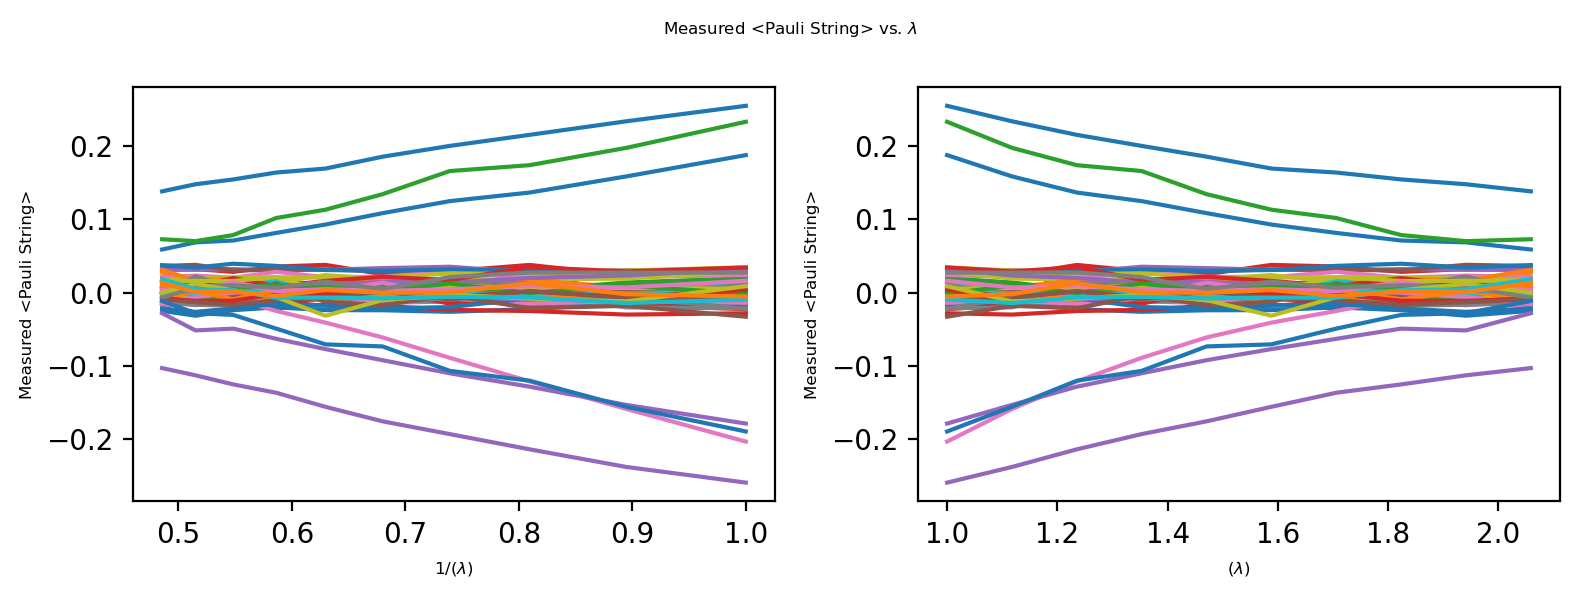

In [130]:
axs = plot_parity(res_analysis, sweep_param_parser=unitary_folding_parser_factory(n=17), x_label="$\lambda$")

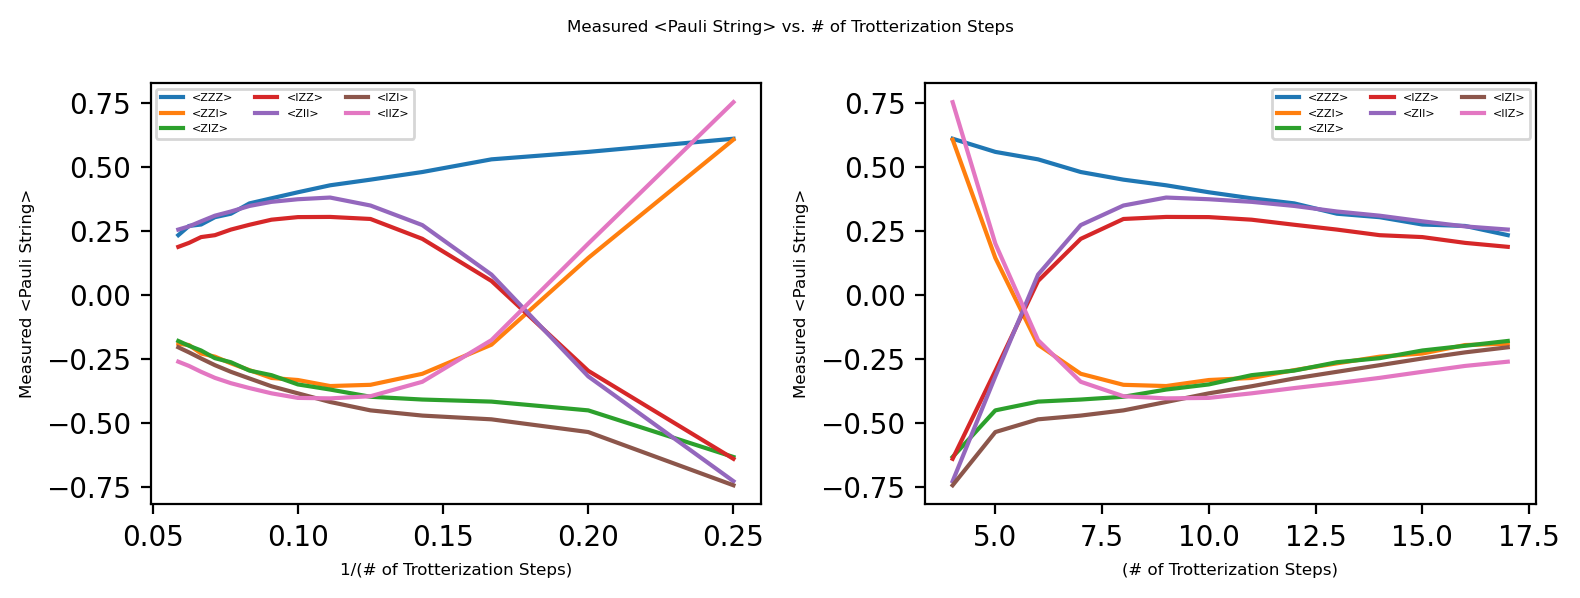

In [131]:
axs = plot_parity(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

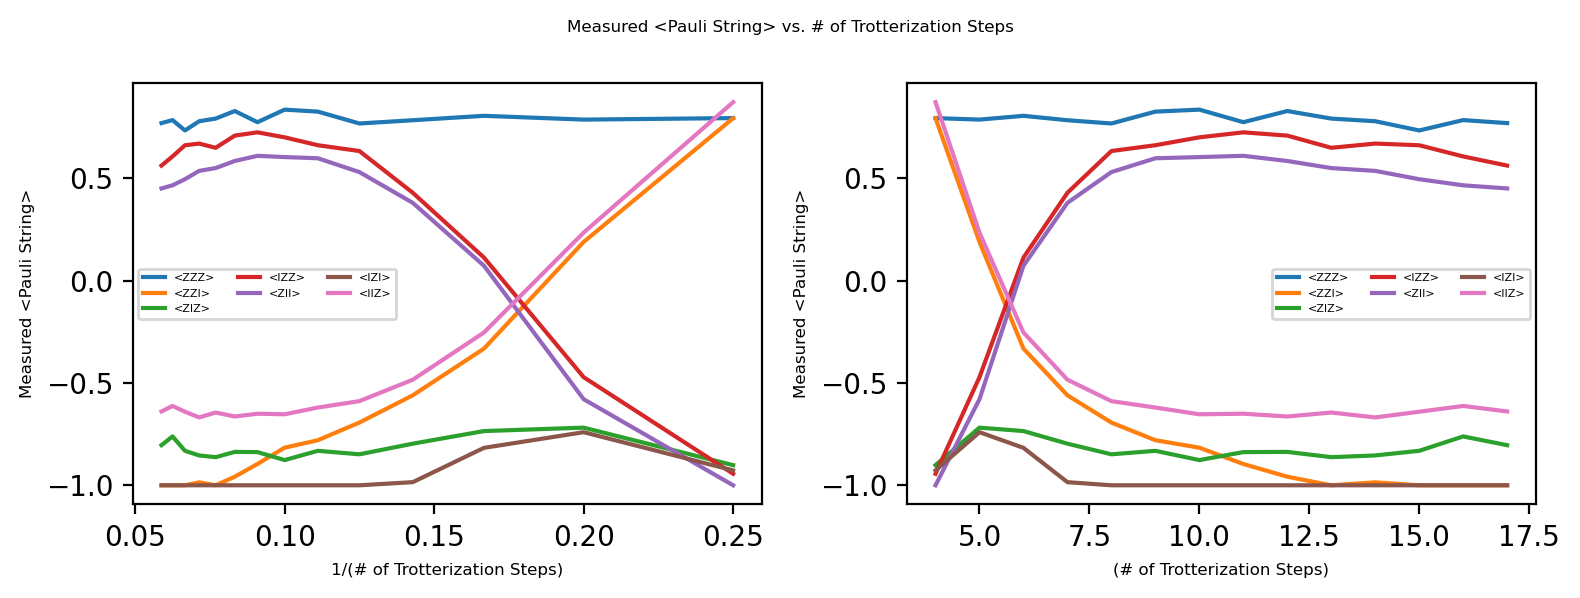

In [138]:
axs = plot_uf_parity(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

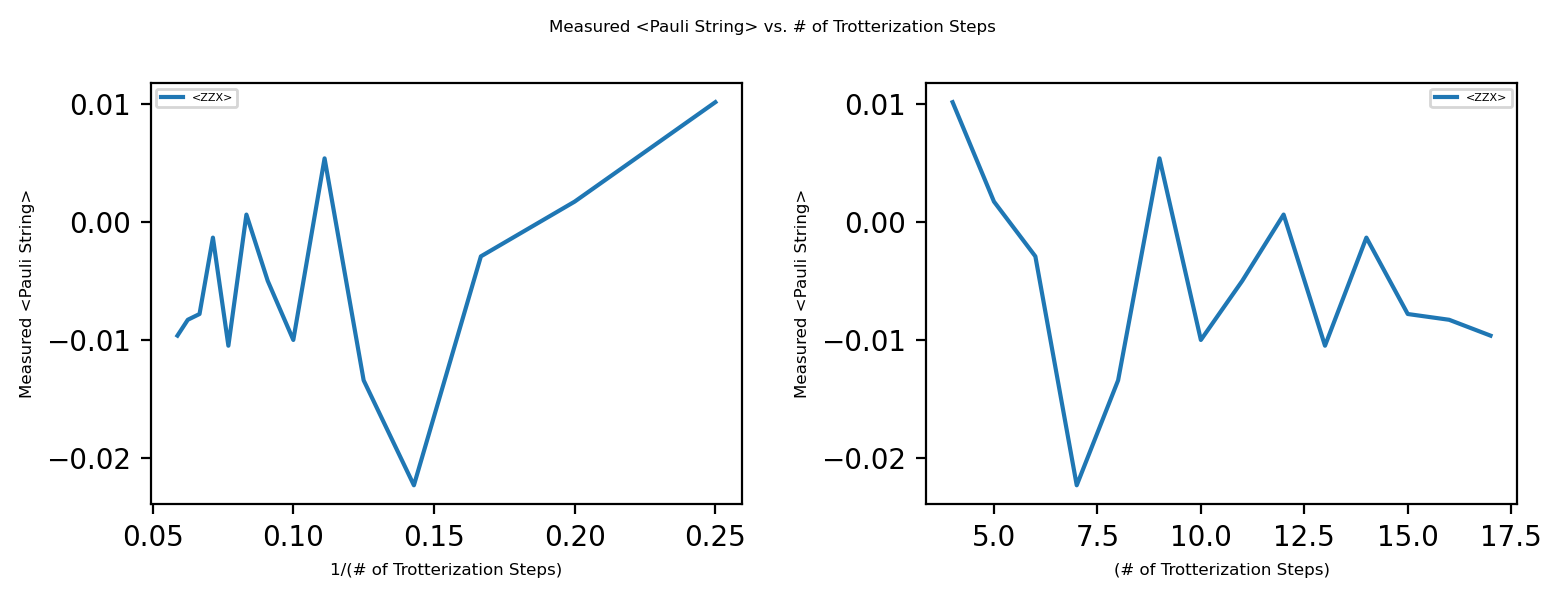

In [139]:
axs = plot_uf_parity(res_analysis, parity_strings=["ZZX"], legend=True)

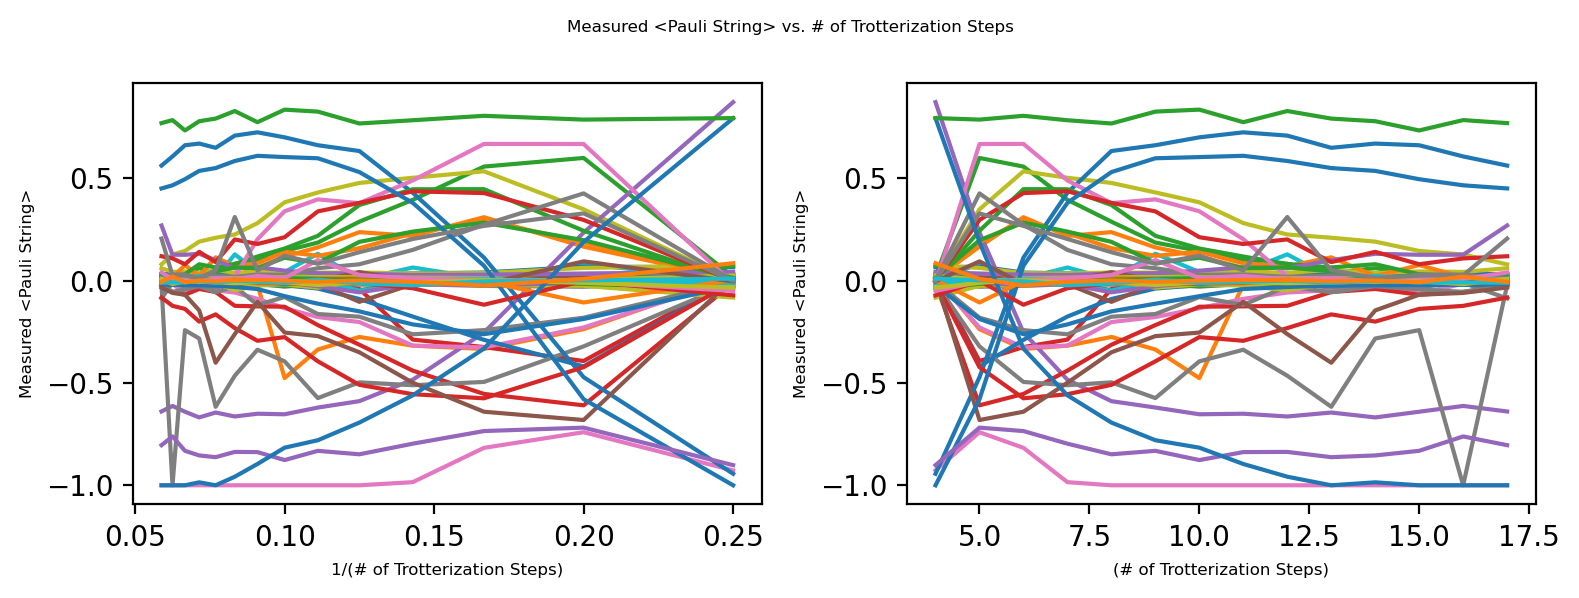

In [140]:
axs = plot_uf_parity(res_analysis)#, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

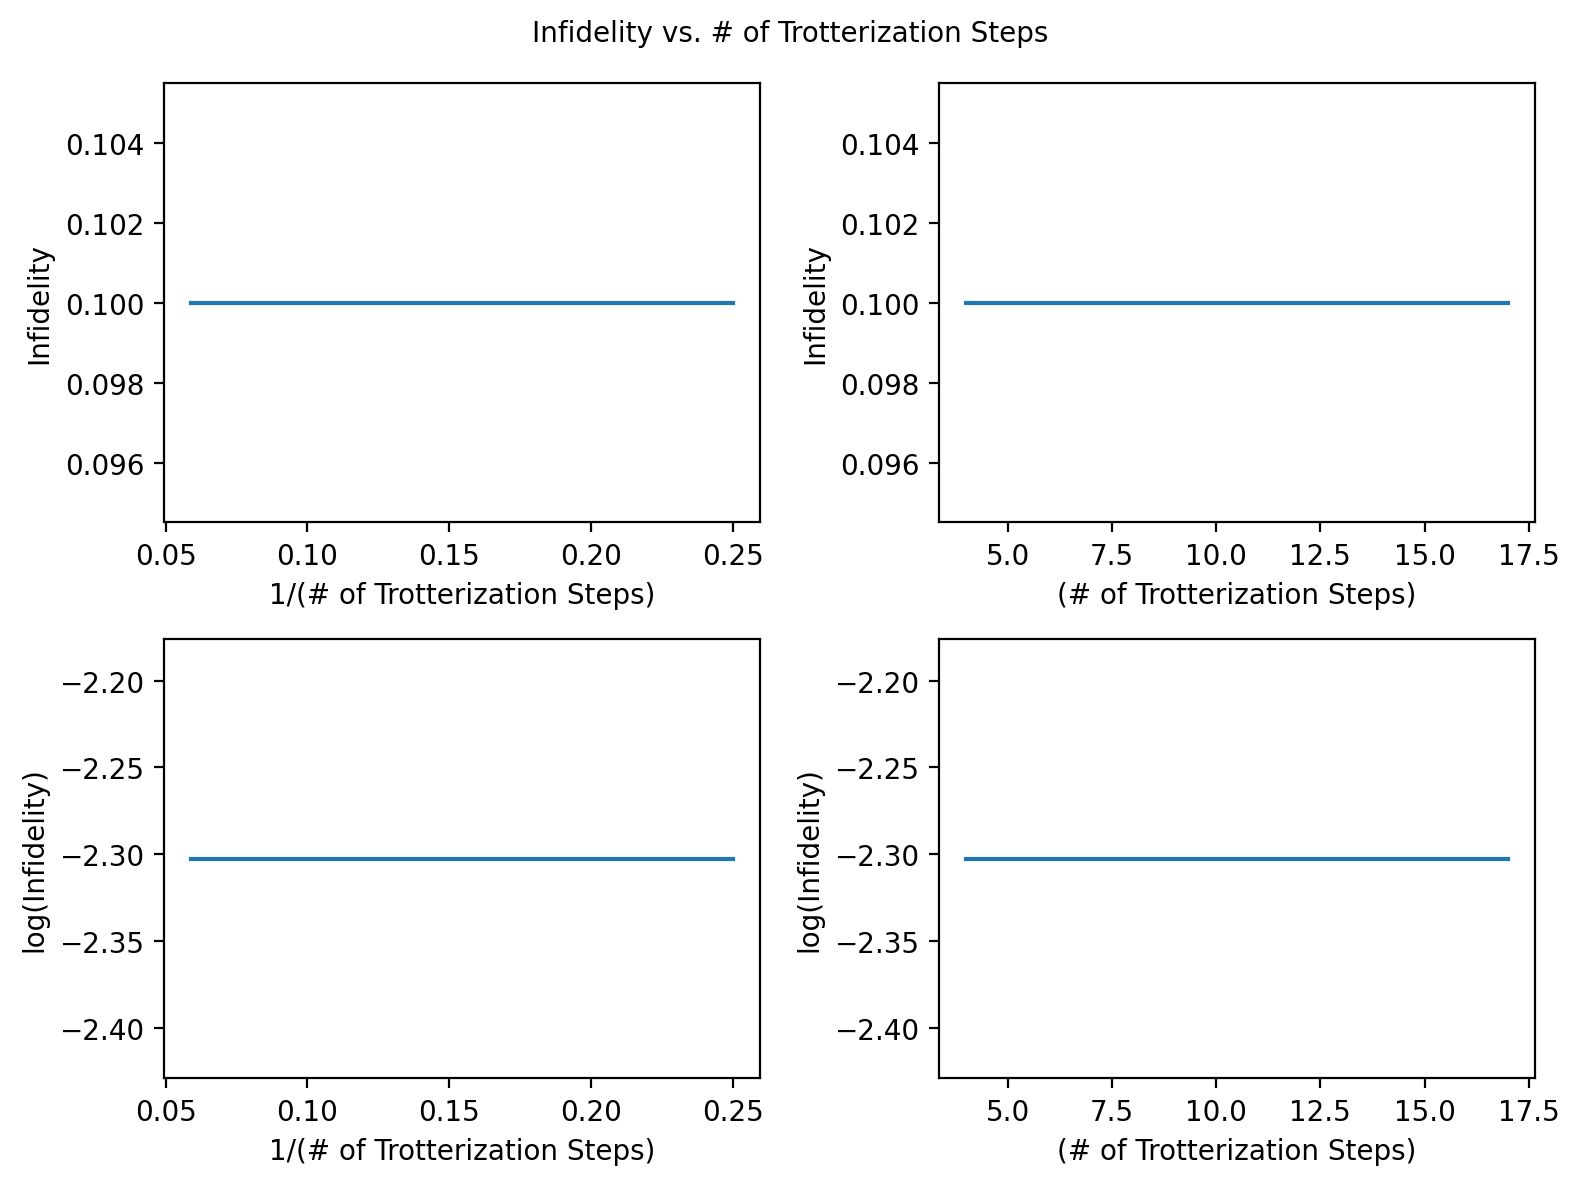

In [118]:
axs = plot_fidelities(res_analysis, key="uf_infid", data_key="analysis")

# Fitting UF Example

(-0.9999945661722461, 9.536825812127208)

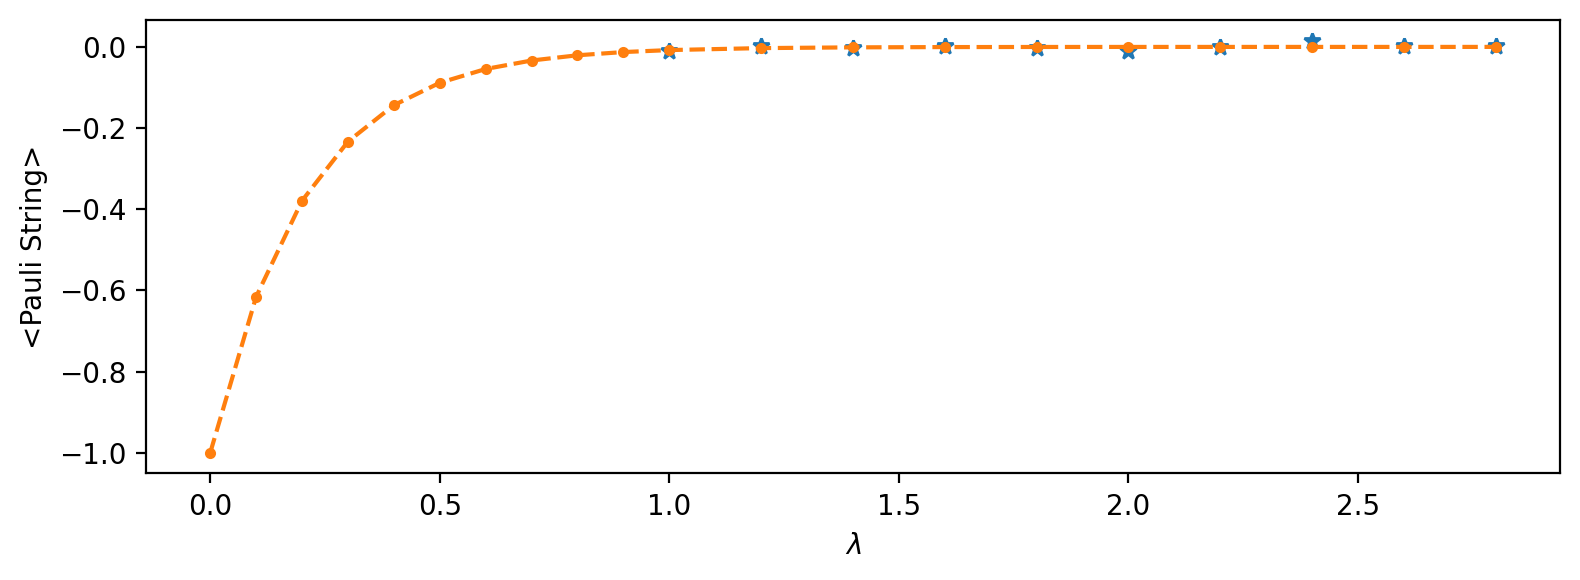

In [127]:
steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["parity"]["ZZX"], sweep_param_parser = unitary_folding_parser_factory(10))
fit_uf(steps, metric, plotting=True)

(0.4511015838566229, 0.014273890061344968)

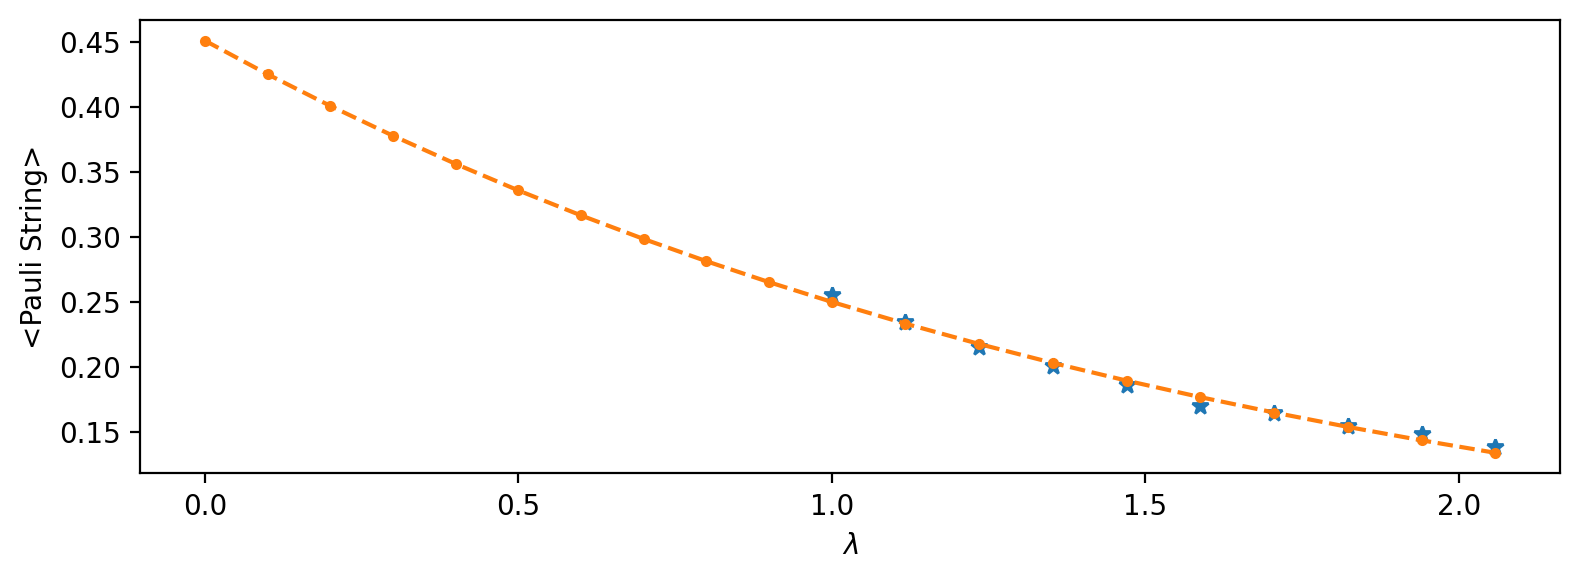

In [128]:
steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["parity"]["ZII"], sweep_param_parser = sweep_param_parser_UF)
fit_uf(steps, metric, plotting=True)

0.012144634852507738

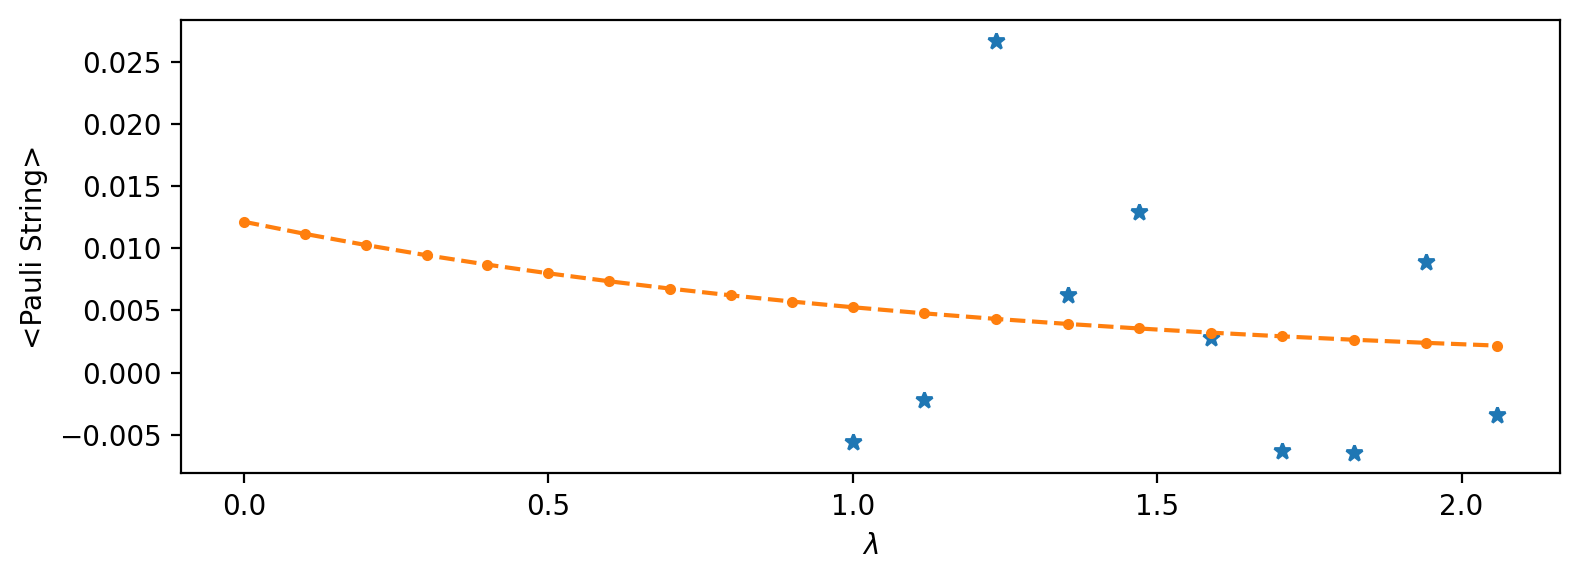

In [122]:
steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["parity"]["XXX"], sweep_param_parser = sweep_param_parser_UF)
fit_uf(steps, metric, plotting=True)